In [3]:
!git clone https://github.com/valmirf/mineracao_textual.git

Cloning into 'mineracao_textual'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 148 (delta 74), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (148/148), 4.14 MiB | 4.24 MiB/s, done.
Resolving deltas: 100% (74/74), done.


# Exercício: Classificando Petição Inicial de Problemas com Viagens

In [4]:
import pandas as pd

df = data = pd.read_csv("mineracao_textual/Dados/dataset_ness_law.csv")
df.head()

,txt,objeto
0,fatos joão césar sala eldorado contagem marque...,Extravio de Bagagem
1,fatos fatos ocorridos trecho conforme document...,Doméstico
2,fatos autores presente ação programaram meses ...,Atraso ou Cancelamento de Voo
3,fatos objetivando viajar porto alegre particip...,Alteração na Malha Aérea
4,fatos autor comprou passagem retorno casa após...,Extravio de Bagagem


Analise a distribuição das classes, indicadas na coluna `Class Name`

In [5]:
# sua resposta
df['objeto'].value_counts()

Atraso ou Cancelamento de Voo      136
Alteração na Malha Aérea            79
Doméstico                           59
Extravio de Bagagem                 49
Inconformidade de Taxas             26
Embarque Impedido                   16
Equívoco ou Atraso no Reembolso      9
Danificação de Bagagem               9
Provisório                           8
Erro ou Alteração na Reserva         6
Outros                               3
Name: objeto, dtype: int64

Analise a distribuição do comprimento dos reviews, plote um histograma (`DataFrame.plot.hist()`)

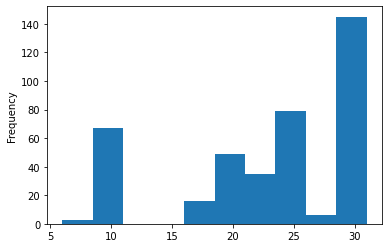

In [6]:
# sua resposta
df['TamanhoObjeto'] = df['objeto'].apply(lambda x: len(x))
df['TamanhoObjeto'].plot.hist()

Aplique a função de encoding de rótulos categóricos do Sklearn ([LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)) para converter os rótulos de classe em numeros. Salve em uma coluna adicional no dataframe.

In [7]:
# descartar classes minoritarias
major_classes = list(df['objeto'].value_counts()[0:4].index)
majority      = df.loc[df['objeto'].isin(major_classes),]
minority      = df.loc[~df['objeto'].isin(major_classes),]

print('\n',5*'=', 'major classes: \n',    majority['objeto'].value_counts()[0:4])
print('\n',5*'=', 'minority classes: \n', minority['objeto'].value_counts()[4:])

majority.head()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(majority['objeto'])
majority['label'] = le.transform(majority['objeto'])
majority.head()


 ===== major classes: 
 Atraso ou Cancelamento de Voo    136
Alteração na Malha Aérea          79
Doméstico                         59
Extravio de Bagagem               49
Name: objeto, dtype: int64

 ===== minority classes: 
 Provisório                      8
Erro ou Alteração na Reserva    6
Outros                          3
Name: objeto, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,txt,objeto,TamanhoObjeto,label
0,fatos joão césar sala eldorado contagem marque...,Extravio de Bagagem,19,3
1,fatos fatos ocorridos trecho conforme document...,Doméstico,9,2
2,fatos autores presente ação programaram meses ...,Atraso ou Cancelamento de Voo,29,1
3,fatos objetivando viajar porto alegre particip...,Alteração na Malha Aérea,24,0
4,fatos autor comprou passagem retorno casa após...,Extravio de Bagagem,19,3


Aplique o pipeline de pré-processamento utilizando o NLTK ou SpaCy (tokenização, remoção de stopwords, e/ou lematização e/ou stemming).

In [8]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt') # Punkt sentence tokenizer
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("portuguese"))
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'você', 'hajamos', 'eram', 'tínhamos', 'estiver', 'houverem', 'mas', 'seu', 'pela', 'quem', 'aqueles', 'teria', 'tive', 'foi', 'houvemos', 'deles', 'haja', 'suas', 'sou', 'também', 'tinha', 'tivéramos', 'houvéssemos', 'houveriam', 'tém', 'meus', 'estavam', 'seria', 'aos', 'estiverem', 'e', 'minhas', 'estivermos', 'formos', 'se', 'tua', 'forem', 'tu', 'tivesse', 'um', 'não', 'já', 'fôssemos', 'estivéssemos', 'essas', 'for', 'até', 'minha', 'entre', 'lhe', 'só', 'em', 'tivéssemos', 'houvermos', 'tivessem', 'dos', 'os', 'está', 'essa', 'tuas', 'esse', 'nossos', 'seriam', 'como', 'pelo', 'isso', 'pelos', 'havemos', 'tem', 'tivermos', 'esta', 'nosso', 'estes', 'houverão', 'delas', 'mais', 'nas', 'houveria', 'sejam', 'estejam', 'seremos', 'somos', 'que', 'para', 'dela', 'houvessem', 'teus', 'houverei', 'são', 'estivessem', 'sua', 'estivera', 'ela', 'sejamos', 'eu', 'houveram', 'ter

In [10]:
import string
from nltk.tokenize.regexp import RegexpTokenizer

def preprocess(text):
  
  # remover pontuações
  text   = text.translate(string.punctuation)
  
  # converter para lowercase
  text = text.lower()
  
  # tokenizar o texto em palavras
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(text.lower())

  # filtrar palavras
  tokens = [word for word in tokens
            if word not in stop_words       # descartar stopwords
                and len(word) > 3          # descartar palavras com menos de 3 caracteres
                and not word[0].isdigit()] # descartar tokens contendo apenas numeros

  return ' '.join(tokens)

majority_pos = []
for doc in majority['txt']:
#for doc in majority['objeto']:
  majority_pos.append(preprocess(doc))

print(majority_pos[0])

fatos joão césar sala eldorado contagem marques medeiros advogados requerente viajou trabalho cidade corumbá realização acompanhamento perícia determinada processo judicial desembarcar esteira verificando após alguns minutos bagagem encontrava dirigindo recepção companhia aérea sendo informado encontrava campinas local onde escala solicitado césar augusto preenche formulário após informado bagagem poderia retirada contudo referida data requerido passagem comprada retorno além precisar equipamentos segurança obrigatório acompanhamento perícia tais colete segurança botina uniforme dentre outros funcionário azul elton solicitou autor realiza compra roupas pessoal higiene valor reembolsado apresentação respectivo comprovante contudo tais objetos equipamentos necessários realização trabalho realizada reembolso parcialmente realizado césar verificou havia vindo curitiba cidade próxima corumbá podendo empresa levar utilizando carro possibilitaria realiza trabalho maiores problemas contudo elt

Em seguida, utilize as funções de transformação do Scikit-Learn para textos, utilizando os atributos de n-gramas para classificar os textos:
```
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)
```
No qual você pode passar os valores de intervalos de n-gramas:
- um intervalo de ngram de (1, 1) significa apenas unigramas
- (1, 2) significa unigramas e bigrams 
- (2, 2) significa apenas bigrams

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), )
tfidf_model = vectorizer.fit(majority_pos)

X_tfidf = tfidf_model.transform(majority_pos)

print(X_tfidf[0,:])

  (0, 148847)	0.03129658397757183
  (0, 148840)	0.018311708787398028
  (0, 148570)	0.03129658397757183
  (0, 148563)	0.021673571742059312
  (0, 146253)	0.02921207112437228
  (0, 146099)	0.010204725133254988
  (0, 145761)	0.03129658397757183
  (0, 145735)	0.013642314048228046
  (0, 145572)	0.03129658397757183
  (0, 145562)	0.02029441551646866
  (0, 145269)	0.03129658397757183
  (0, 145268)	0.01704259093952433
  (0, 145245)	0.02921207112437228
  (0, 145233)	0.039277097901506935
  (0, 145182)	0.02921207112437228
  (0, 145168)	0.02029441551646866
  (0, 144055)	0.025648572864860403
  (0, 144045)	0.019458898993217115
  (0, 143977)	0.03129658397757183
  (0, 143976)	0.023022397252728994
  (0, 143765)	0.03129658397757183
  (0, 143748)	0.01688439257245792
  (0, 143056)	0.03129658397757183
  (0, 143052)	0.02485607785849934
  (0, 143019)	0.03129658397757183
  :	:
  (0, 6260)	0.03129658397757183
  (0, 6237)	0.017729081339475587
  (0, 5926)	0.03129658397757183
  (0, 5912)	0.02000056175214897
  (0, 5

Separe o conjunto em treino e teste. Utilize a função `sklearn.model_selection.train_test_split()`

In [12]:
import sklearn

X_train = sklearn.model_selection.train_test_split(majority_pos)[0]
X_test = sklearn.model_selection.train_test_split(majority_pos)[1]

X_tfidf_train = tfidf_model.transform(X_train)
X_tfidf_test  = tfidf_model.transform(X_test)

print(X_tfidf_train[0,:])

  (0, 148921)	0.036455078541315314
  (0, 148908)	0.017024867151528598
  (0, 148749)	0.03905643739260093
  (0, 148650)	0.01643222391505718
  (0, 148623)	0.036455078541315314
  (0, 148616)	0.024283649321030287
  (0, 148128)	0.036455078541315314
  (0, 148115)	0.025326328573316827
  (0, 147089)	0.03101903547690041
  (0, 147047)	0.011146183738217599
  (0, 146754)	0.03905643739260093
  (0, 146690)	0.01004581600169488
  (0, 145355)	0.036455078541315314
  (0, 145352)	0.03317775397928993
  (0, 144421)	0.03905643739260093
  (0, 144355)	0.007609274222839606
  (0, 144153)	0.036455078541315314
  (0, 144152)	0.02756097388305566
  (0, 143329)	0.036455078541315314
  (0, 143309)	0.01652727365859627
  (0, 142260)	0.036455078541315314
  (0, 142250)	0.0246127337790968
  (0, 142216)	0.036455078541315314
  (0, 142210)	0.027047440654366903
  (0, 142026)	0.036455078541315314
  :	:
  (0, 4732)	0.03460938506347111
  (0, 4718)	0.024959615031770035
  (0, 4675)	0.060324665468682565
  (0, 4674)	0.05881333472179972


Treine um modelo com o algoritmo `NaiveBayes`, e salve as predições para o conjunto de testes na variável `preds`

In [13]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

majority_train = sklearn.model_selection.train_test_split(majority)[0]
majority_test = sklearn.model_selection.train_test_split(majority)[1]

clf.fit(X_tfidf_train, majority_train.label)

acc = clf.score(X_tfidf_test , majority_test.label)
print('Acurácia: ', acc)

Acurácia:  0.5061728395061729


In [14]:
preds = clf.predict(X_tfidf_test)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Analise os resultados das predições

In [15]:
from sklearn import metrics
print(metrics.classification_report(majority_test.label, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.51      1.00      0.68        41
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        11

    accuracy                           0.51        81
   macro avg       0.13      0.25      0.17        81
weighted avg       0.26      0.51      0.34        81



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## BOW + NB

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2))
Bow_model = vectorizer.fit(majority_pos)

X_bow = Bow_model.transform(majority_pos)

print(X_bow[0,:])

  (0, 404)	1
  (0, 438)	1
  (0, 1560)	3
  (0, 1561)	1
  (0, 1565)	2
  (0, 2737)	1
  (0, 2738)	1
  (0, 3446)	5
  (0, 3472)	1
  (0, 3484)	1
  (0, 3488)	1
  (0, 3498)	1
  (0, 3503)	1
  (0, 4482)	2
  (0, 4485)	2
  (0, 4697)	1
  (0, 4698)	1
  (0, 5060)	1
  (0, 5063)	1
  (0, 5431)	1
  (0, 5657)	1
  (0, 5912)	1
  (0, 5926)	1
  (0, 6237)	1
  (0, 6260)	1
  :	:
  (0, 143019)	1
  (0, 143052)	1
  (0, 143056)	1
  (0, 143748)	1
  (0, 143765)	1
  (0, 143976)	1
  (0, 143977)	1
  (0, 144045)	1
  (0, 144055)	1
  (0, 145168)	1
  (0, 145182)	1
  (0, 145233)	3
  (0, 145245)	1
  (0, 145268)	1
  (0, 145269)	1
  (0, 145562)	1
  (0, 145572)	1
  (0, 145735)	1
  (0, 145761)	1
  (0, 146099)	1
  (0, 146253)	1
  (0, 148563)	1
  (0, 148570)	1
  (0, 148840)	1
  (0, 148847)	1


In [17]:
import sklearn

X_train = sklearn.model_selection.train_test_split(majority_pos)[0]
X_test = sklearn.model_selection.train_test_split(majority_pos)[1]

X_bow_train = Bow_model.transform(X_train)
X_bow_test  = Bow_model.transform(X_test)

print(X_bow_train[0,:])

  (0, 249)	1
  (0, 251)	1
  (0, 826)	1
  (0, 833)	1
  (0, 1595)	1
  (0, 1604)	1
  (0, 1616)	1
  (0, 1618)	1
  (0, 2282)	1
  (0, 2356)	1
  (0, 2934)	1
  (0, 2945)	1
  (0, 3179)	1
  (0, 3194)	1
  (0, 4459)	1
  (0, 4460)	1
  (0, 5431)	1
  (0, 5659)	1
  (0, 6495)	1
  (0, 6546)	1
  (0, 6661)	1
  (0, 6665)	1
  (0, 7393)	1
  (0, 7443)	1
  (0, 7674)	1
  :	:
  (0, 144691)	1
  (0, 145016)	1
  (0, 145086)	1
  (0, 145233)	1
  (0, 145264)	1
  (0, 145611)	3
  (0, 145621)	2
  (0, 145627)	1
  (0, 145906)	1
  (0, 145933)	1
  (0, 146099)	1
  (0, 146246)	1
  (0, 146690)	1
  (0, 146875)	1
  (0, 147488)	1
  (0, 147489)	1
  (0, 147764)	1
  (0, 147765)	1
  (0, 147935)	2
  (0, 147936)	1
  (0, 147937)	1
  (0, 148584)	1
  (0, 148585)	1
  (0, 148908)	1
  (0, 148917)	1


In [18]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

majority_train = sklearn.model_selection.train_test_split(majority)[0]
majority_test = sklearn.model_selection.train_test_split(majority)[1]

#clf.fit(X_tfidf_train, majority_train.label)

#acc = clf.score(X_tfidf_test , majority_test.label)
#print('Acurácia: ', acc)

clf.fit(X_bow_train, majority_train.label)

acc = clf.score(X_bow_test , majority_test.label)
print('Acurácia: ', acc)

Acurácia:  0.2839506172839506


In [19]:
preds = clf.predict(X_bow_test)
preds

array([1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 2, 0, 1, 0, 3, 0, 2, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 3, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 3, 1,
       1, 1, 3, 0, 1, 0, 0, 1, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [20]:
from sklearn import metrics
print(metrics.classification_report(majority_test.label, preds))

              precision    recall  f1-score   support

           0       0.14      0.16      0.15        19
           1       0.36      0.49      0.41        35
           2       0.60      0.14      0.23        21
           3       0.00      0.00      0.00         6

    accuracy                           0.28        81
   macro avg       0.27      0.20      0.20        81
weighted avg       0.34      0.28      0.27        81



Discuta os resultados. Qual foi a melhor abordagem? Qual foi a pior? Porque você acha que esses resultados foram o melhor e o pior? Algum resultado chamou sua atenção, porque?

####Ambas tiveram uma acurácia baixa, apesar do IF-IDF ter um resultado maior. Entranto, o desbalanceamento parece ter maior influência sobre ele pois, quase a totalidade das classificações são para o rótulo mais frequente. Enquanto isso, Bag of Words também classifica outros rótulos, por mais que estejam errados com mais frequência que a primeira técnica. Assim, melhor ou pior dependerá da aplicação, se a ideia é focar nos atrasos e cancelamentos a primeira é mais coerente, mas se a busca é para tentar realmente diversificar para passar para o departamento responsável, por exemplo, a segunda parece mais coerente. Contudo, vale tentar melhorar a acurácia antes de sua aplicação final.